In [1]:
import pandas as pa import numpy as np
Import seaborn as sns import matplotlib.pyplot as plt
from sklear.model_selection import train_test_ split fren sklearn, Ilnear_eodel import LoglsticRegression
fron sklearn.setrics import accuracy_scord, confusion matrix, classification report

SyntaxError: invalid non-printable character U+00A0 (2898518544.py, line 4)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [6]:
data = pd.read_csv("C:/Users/rugwe/Downloads/green_tech_data.csv")
print(data.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [7]:
# Check for null values
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


sustainability
0    85
1    15
Name: count, dtype: int64


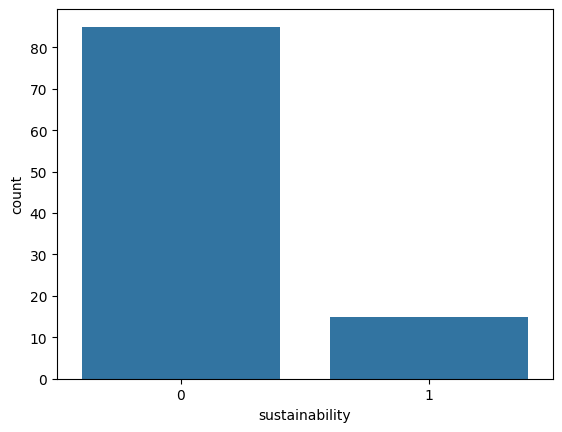

In [11]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts()) 
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

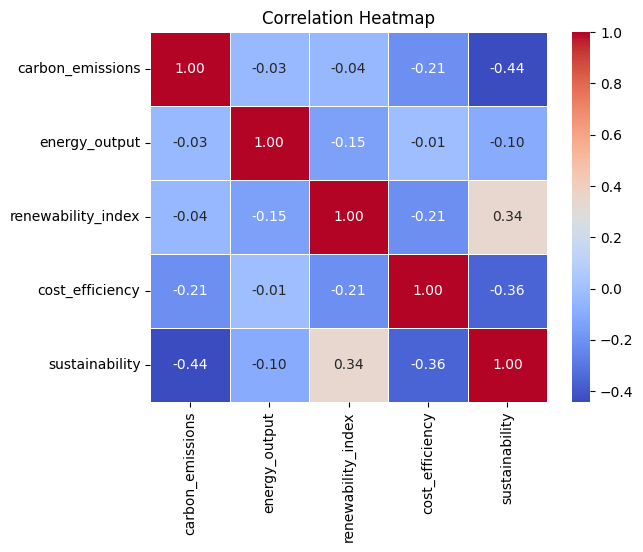

In [12]:
corr = data.corr()
# Generate the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#define X and Y for column: carbon_emissions	energy_output	renewability_index	cost_efficiency	sustainability

X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
Y = data['sustainability']

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [21]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [25]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


In [29]:
#confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [34]:
#classification report
cr = classification_report(ytest, ypred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [35]:
#Feature Importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [36]:
import joblib

joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [37]:
import joblib
# Load the model from the file
model = joblib.load('lrmodel_sustainable.pkl')
# Example data for prediction
new_data = np.array([[22,25,60]])
# Make predictions
predictions = model.predict(new_data)
# Print the predictions
print(predictions)

[0]


C:\Users\rugwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
